Step 1: Import Libraries

In [17]:
# importing the libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2: Load the dataset

In [18]:
df = pd.read_csv("data/Base.csv", 
                  sep=',')

Step 3: Inspect the dataset

In [19]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

Step 3: Look for missing values - this returned null fsr

In [21]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [22]:
missing_values_rows = df[df.isnull().any(axis=1)]
missing_values_rows

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


Step 4: Look for duplicate values - also null + added spliting data into this step (Got really messy so I didnt)

In [23]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


Step 5: Look for categorical data - use one hot encoding

In [24]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [25]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

In [26]:
df = pd.get_dummies(df, drop_first=True)
object_columns = df.select_dtypes(include='object').columns
object_columns

Index([], dtype='object')

In [27]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,True,False,False,False,False,False,False,False,False,False
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,True,False,False,False,False,False,False,True,False,False
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,True,False,False,False,False,False,False,False,True,False
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,True,False,False,False,False,False,False,False,False,False
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,True,False,False,False,False,False,False,True,False,False


Step 5: Feature Scaling 

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.0,0.250,0.986507,0.000000,0.060606,0.375,0.000086,0.918255,0.157934,0.785651,...,True,False,False,False,False,False,False,False,False,False
1,0.0,0.875,0.617426,0.000000,0.209790,0.125,0.000129,0.114260,0.247350,0.556307,...,True,False,False,False,False,False,False,True,False,False
2,0.0,0.875,0.996708,0.026042,0.034965,0.375,0.000157,0.109273,0.163308,0.274904,...,True,False,False,False,False,False,False,False,True,False
3,0.0,0.625,0.475100,0.031250,0.034965,0.250,0.000089,0.106372,0.519779,0.864767,...,True,False,False,False,False,False,False,False,False,False
4,0.0,1.000,0.842307,0.000000,0.069930,0.375,0.073195,0.487853,0.349007,0.460265,...,True,False,False,False,False,False,False,True,False,False


In [30]:
%pip install seaborn 
# to do some cool graphics stuff

Note: you may need to restart the kernel to use updated packages.


Step 6: Univariate Analysis

In [31]:
num_columns = len(df.columns)
num_columns

48

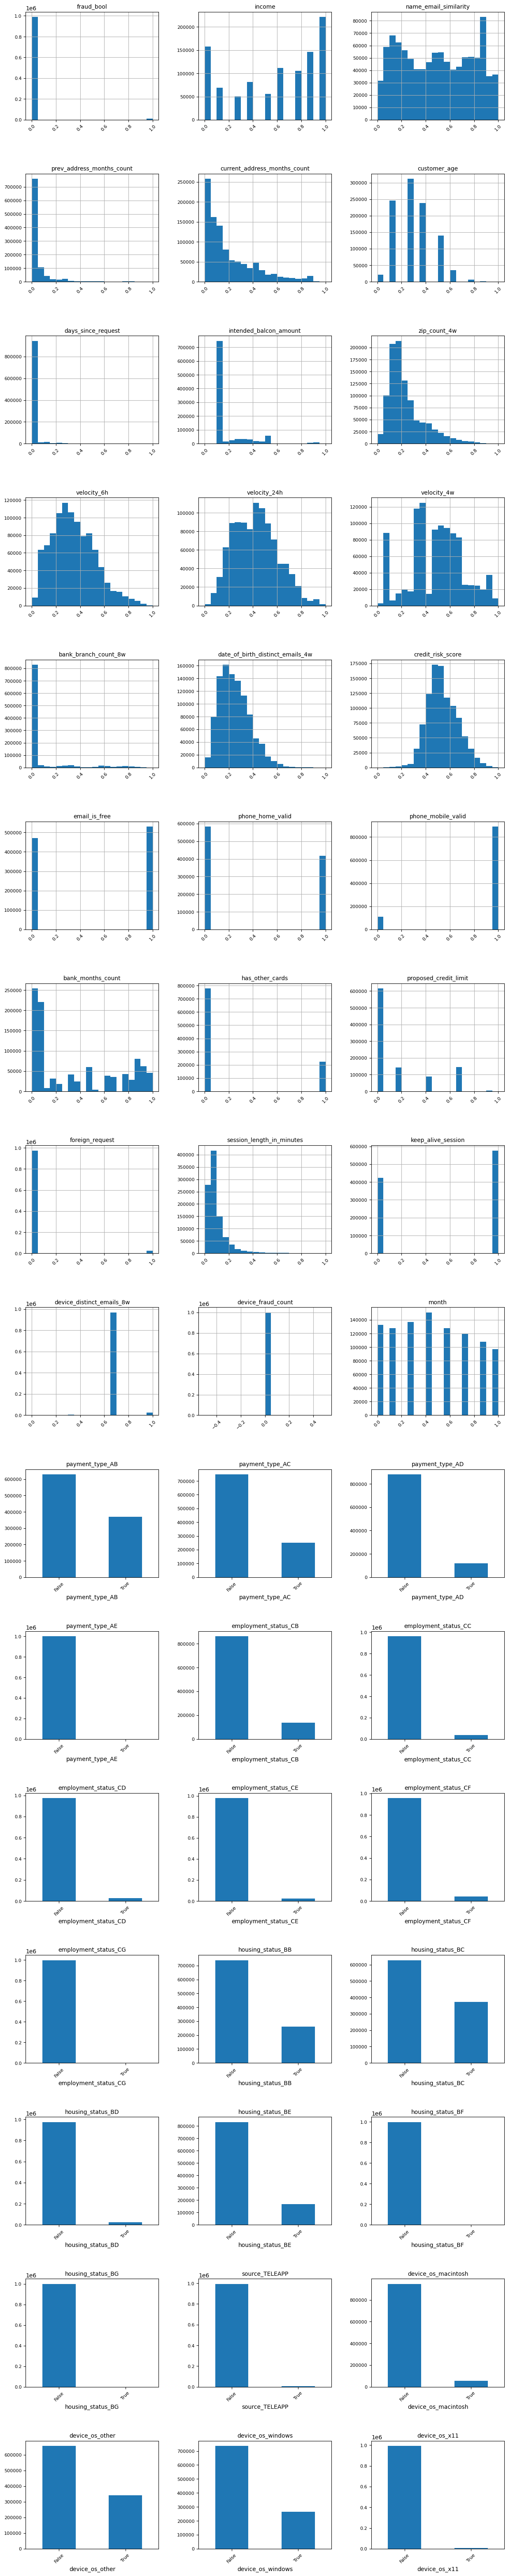

In [32]:
features_per_row = 3
num_rows = (len(df.columns) + features_per_row - 1) // features_per_row

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, features_per_row, i + 1)
    
    if df[column].dtype in ['int64', 'float64']:
        df[column].hist(bins=20)
        plt.title(column, fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.yticks(fontsize=8)
    
    else:
        df[column].value_counts().plot(kind='bar')
        plt.title(column, fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.yticks(fontsize=8)
    
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


In [33]:
summary_statistics = df.describe()
summary_statistics

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.578369,0.493694,0.046142,0.204168,0.296113,0.013073,0.188283,0.234616,0.345602,...,0.889676,0.358767,0.222988,0.170603,0.025242,0.098332,0.576947,0.672771,0.0,0.469811
std,0.104438,0.362928,0.289125,0.114704,0.206076,0.150322,0.068596,0.157495,0.150078,0.178216,...,0.313293,0.367178,0.416251,0.255267,0.156859,0.092442,0.494044,0.060254,0.0,0.315713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.250000,0.225215,0.000000,0.046620,0.125000,0.000092,0.111677,0.133303,0.213605,...,1.000000,0.000000,0.000000,0.005236,0.000000,0.047216,0.000000,0.666667,0.0,0.142857
50%,0.000000,0.625000,0.492152,0.000000,0.123543,0.250000,0.000193,0.114408,0.188386,0.325140,...,1.000000,0.181818,0.000000,0.005236,0.000000,0.070361,1.000000,0.666667,0.0,0.428571
75%,0.000000,0.875000,0.755567,0.033854,0.305361,0.375000,0.000336,0.159663,0.290043,0.464956,...,1.000000,0.787879,0.000000,0.162304,0.000000,0.113535,1.000000,0.666667,0.0,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


Step 7: Correlation Matrix

In [34]:
corr_matrix = df.corr()
corr_matrix = corr_matrix.round(2)
corr_matrix

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
fraud_bool,1.00,0.05,-0.04,-0.03,0.03,0.06,0.00,-0.02,0.01,-0.02,...,-0.04,-0.00,-0.03,-0.00,-0.00,0.00,0.01,-0.04,0.08,0.00
income,0.05,1.00,-0.04,0.02,-0.04,0.13,-0.02,0.06,-0.08,-0.10,...,0.05,0.01,-0.15,-0.00,-0.00,-0.01,0.03,0.02,0.03,0.01
name_email_similarity,-0.04,-0.04,1.00,-0.02,0.05,-0.05,-0.01,0.03,0.03,0.02,...,-0.03,-0.01,0.08,-0.00,0.00,-0.01,0.01,0.01,0.03,0.00
prev_address_months_count,-0.03,0.02,-0.02,1.00,-0.27,-0.07,0.08,-0.01,-0.03,-0.00,...,0.12,0.02,-0.07,0.00,0.00,-0.01,0.01,-0.03,-0.02,0.01
current_address_months_count,0.03,-0.04,0.05,-0.27,1.00,0.14,-0.06,0.06,0.05,0.03,...,-0.35,-0.02,0.23,0.00,0.00,0.01,-0.01,0.02,0.05,-0.00
customer_age,0.06,0.13,-0.05,-0.07,0.14,1.00,-0.04,-0.01,-0.01,-0.02,...,-0.05,0.01,-0.32,0.00,0.00,0.02,-0.05,-0.11,0.10,0.02
days_since_request,0.00,-0.02,-0.01,0.08,-0.06,-0.04,1.00,0.02,0.00,0.03,...,0.04,0.01,-0.00,0.00,0.00,0.02,0.00,0.00,-0.02,0.01
intended_balcon_amount,-0.02,0.06,0.03,-0.01,0.06,-0.01,0.02,1.00,0.00,0.04,...,0.05,0.00,0.08,0.01,0.01,-0.01,0.03,0.06,-0.04,0.02
zip_count_4w,0.01,-0.08,0.03,-0.03,0.05,-0.01,0.00,0.00,1.00,0.14,...,-0.01,-0.02,0.05,-0.00,0.00,-0.00,-0.01,-0.02,-0.01,0.00
velocity_6h,-0.02,-0.10,0.02,-0.00,0.03,-0.02,0.03,0.04,0.14,1.00,...,0.02,-0.02,0.06,0.00,0.00,-0.00,-0.00,-0.00,-0.02,0.01


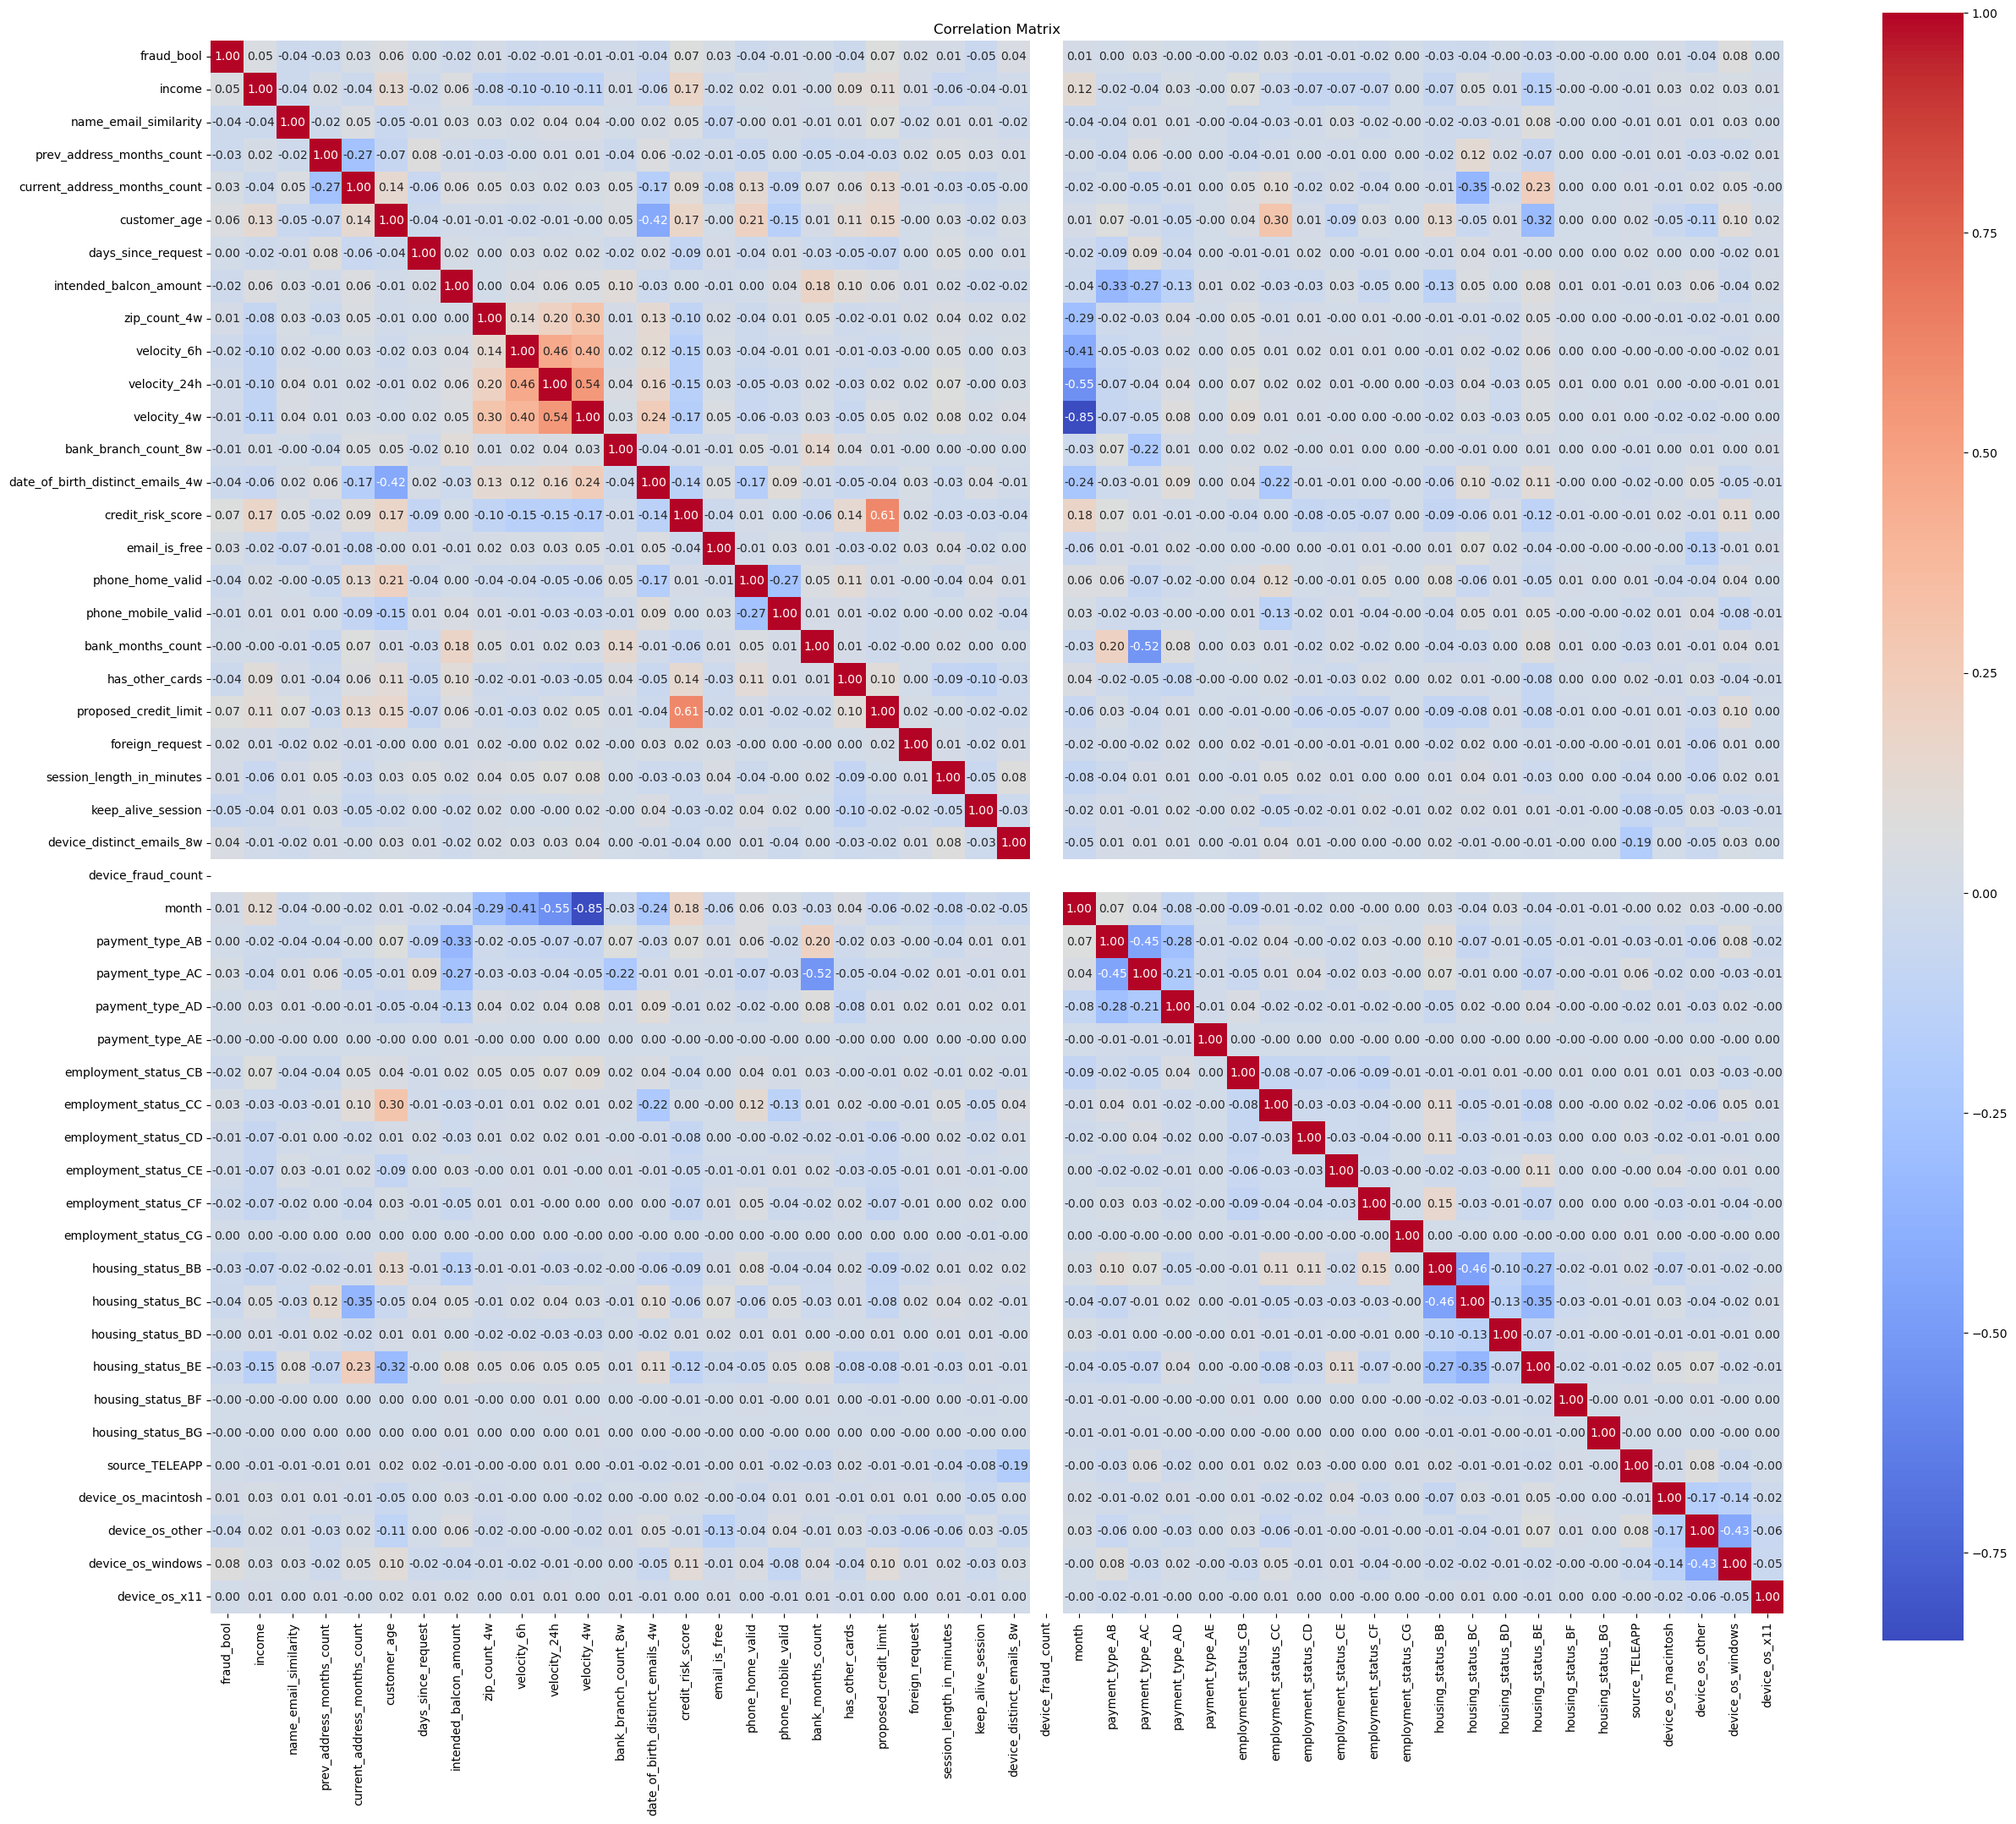

In [35]:
import seaborn as sns
plt.figure(figsize=(30, 25))  # The figure size can be adjusted depending on your dataset and screen resolution
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Step 8: Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# not sure if I'm meant to inverse scale this for a classification problem
y = df['fraud_bool']

X = df.drop('fraud_bool', axis=1)

log_reg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

log_reg.fit(X, y)

model = SelectFromModel(log_reg, prefit=True)

selected_features = model.get_support(indices=True)

X_selected = X.iloc[:, selected_features]

print(f"Number of features before selection: {X.shape[1]}")
print(f"Number of features after selection: {X_selected.shape[1]}")
print("Selected features:", list(X.columns[selected_features]))


Number of features before selection: 47
Number of features after selection: 45
Selected features: ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh', 'de

In [38]:
removed_features = [feature for feature in X.columns if feature not in X.columns[selected_features]]
print("Removed features:", removed_features)

Removed features: ['device_fraud_count', 'employment_status_CG']


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_selected)
n_components = pca.n_components_
X_pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(27)])

print(f"PCA selected {n_components} components to capture 95% of the variance.")

PCA selected 27 components to capture 95% of the variance.


Some visualisations of the new dataframe that I got off chatgpt (Not 100 Sure what they mean)

* Plot 1 tells you the significance of each principal component individually.
* Plot 2 can give you a visual intuition about how well your data is spread across the two most significant principal components, which can be insightful for clustering tendencies or data separation.
* Plot 3 helps in decision-making about the number of principal components to retain for capturing the majority of variance in the data without having to retain all dimensions.

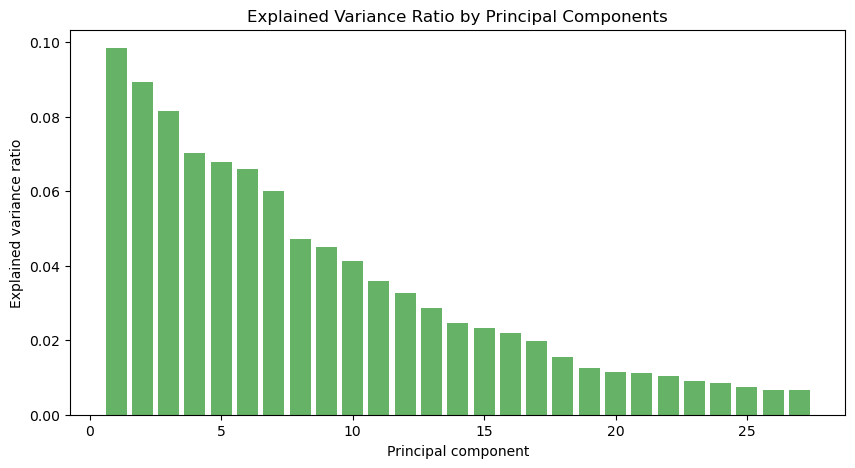

In [45]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.6, color='g', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

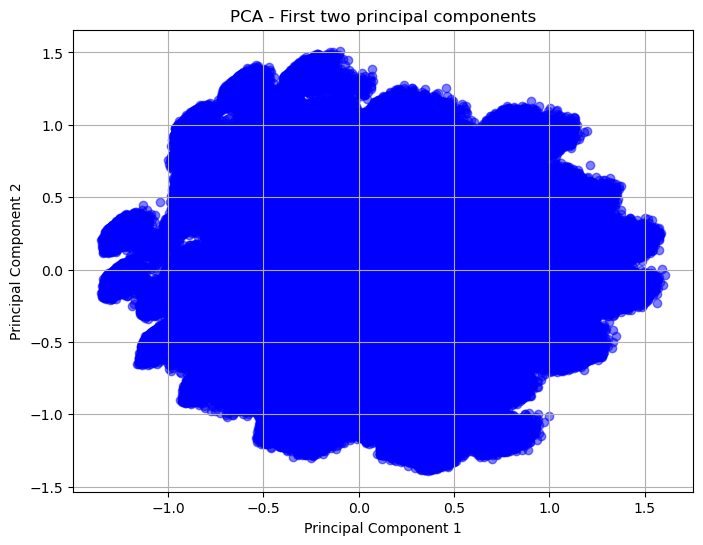

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], alpha=0.5, color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First two principal components')
plt.grid(True)
plt.show()

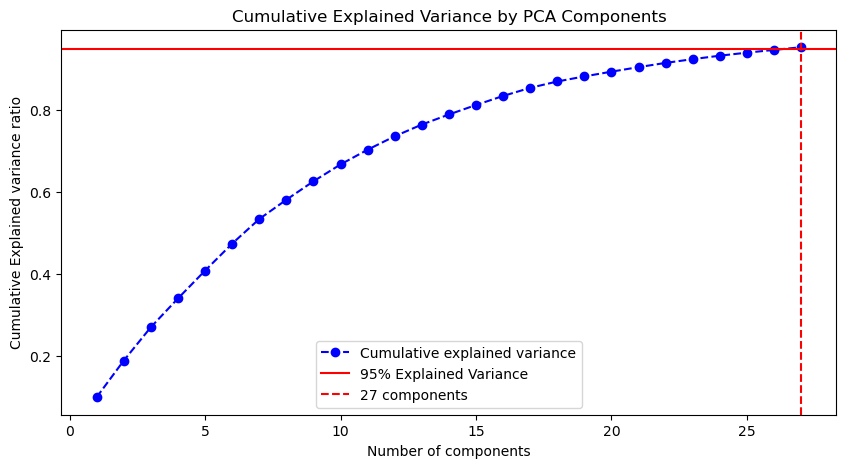

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b', label='Cumulative explained variance')
plt.ylabel('Cumulative Explained variance ratio')
plt.xlabel('Number of components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} components')
plt.legend(loc='best')
plt.show()